In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Load the Data
sales_df = pd.read_csv('sales.csv')
customers_df = pd.read_csv('customers.csv')
service_df = pd.read_csv('service.csv')
marketing_df = pd.read_csv('marketing.csv')


In [3]:
# 2. Assess Data Quality
print("Sales Data Info:\n", sales_df.info())
print("\nSales Data Nulls:\n", sales_df.isnull().sum())
print("\nSales Data Duplicates:\n", sales_df.duplicated().sum())

print("\nCustomers Data Info:\n", customers_df.info())
print("\nCustomers Data Nulls:\n", customers_df.isnull().sum())
print("\nCustomers Data Duplicates:\n", customers_df.duplicated().sum())

print("\nService Data Info:\n", service_df.info())
print("\nService Data Nulls:\n", service_df.isnull().sum())
print("\nService Data Duplicates:\n", service_df.duplicated().sum())

print("\nMarketing Data Info:\n", marketing_df.info())
print("\nMarketing Data Nulls:\n", marketing_df.isnull().sum())
print("\nMarketing Data Duplicates:\n", marketing_df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      1000 non-null   int64  
 1   customer_id         1000 non-null   int64  
 2   product_id          1000 non-null   int64  
 3   product_name        1000 non-null   object 
 4   purchase_amount     1000 non-null   float64
 5   purchase_timestamp  1000 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB
Sales Data Info:
 None

Sales Data Nulls:
 transaction_id        0
customer_id           0
product_id            0
product_name          0
purchase_amount       0
purchase_timestamp    0
dtype: int64

Sales Data Duplicates:
 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   cu

In [4]:
# 3. Clean the Data
# Example: Handling missing values (imputation or removal)
sales_df = sales_df.dropna()  # Remove rows with missing values
customers_df['gender'].fillna('Unknown', inplace=True) #fill null gender with unknown
# Example: Removing duplicates
sales_df.drop_duplicates(inplace=True)

# Example: Standardizing formats (date conversion)
sales_df['purchase_timestamp'] = pd.to_datetime(sales_df['purchase_timestamp'])
customers_df['account_creation_date'] = pd.to_datetime(customers_df['account_creation_date'])
service_df['service_timestamp'] = pd.to_datetime(service_df['service_timestamp'])
marketing_df['interaction_timestamp'] = pd.to_datetime(marketing_df['interaction_timestamp'])


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17024\750229619.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers_df['gender'].fillna('Unknown', inplace=True) #fill null gender with unknown


In [5]:
# 4. Transform the Data
# Example: Creating new features
sales_df['purchase_month'] = sales_df['purchase_timestamp'].dt.to_period('M')
customers_df['customer_tenure'] = (pd.to_datetime('now') - customers_df['account_creation_date']).dt.days

# Example: Aggregating data
monthly_sales = sales_df.groupby('purchase_month')['purchase_amount'].sum()
print("\nMonthly Sales:\n", monthly_sales)



Monthly Sales:
 purchase_month
2024-03     1685.47
2024-04     8728.48
2024-05    10624.36
2024-06     7606.95
2024-07     9639.32
2024-08     7786.81
2024-09     8827.31
2024-10     9090.85
2024-11    10800.74
2024-12     9230.44
2025-01     7365.25
2025-02     7930.69
2025-03     6530.52
Freq: M, Name: purchase_amount, dtype: float64


In [6]:
# 5. Consolidate the Data
customer_master = pd.merge(customers_df, sales_df, on='customer_id', how='left')
customer_master = pd.merge(customer_master, service_df, on='customer_id', how='left')
customer_master = pd.merge(customer_master, marketing_df, on='customer_id', how='left')

In [7]:
# 6. Document and Validate (EDA)
print("\nFinal Merged Data Info:\n", customer_master.info())
print("\nFinal Merged Data Nulls:\n", customer_master.isnull().sum())
print("\nFinal Merged Data Head:\n", customer_master.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4628 entries, 0 to 4627
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            4628 non-null   int64         
 1   age                    4628 non-null   int64         
 2   gender                 4628 non-null   object        
 3   location               4628 non-null   object        
 4   account_creation_date  4628 non-null   datetime64[ns]
 5   customer_tenure        4628 non-null   int64         
 6   transaction_id         4626 non-null   float64       
 7   product_id             4626 non-null   float64       
 8   product_name           4626 non-null   object        
 9   purchase_amount        4626 non-null   float64       
 10  purchase_timestamp     4626 non-null   datetime64[ns]
 11  purchase_month         4626 non-null   period[M]     
 12  service_id             4009 non-null   float64       
 13  inq

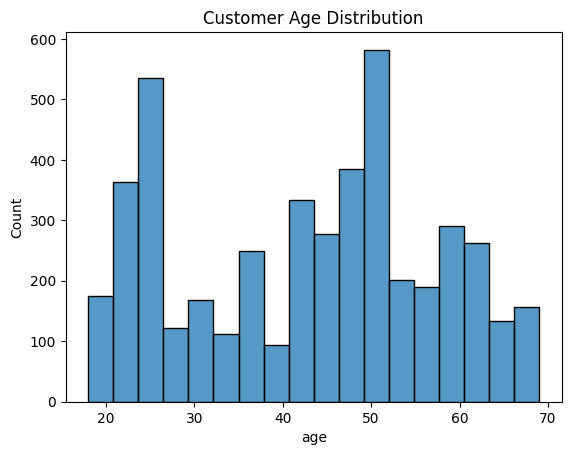

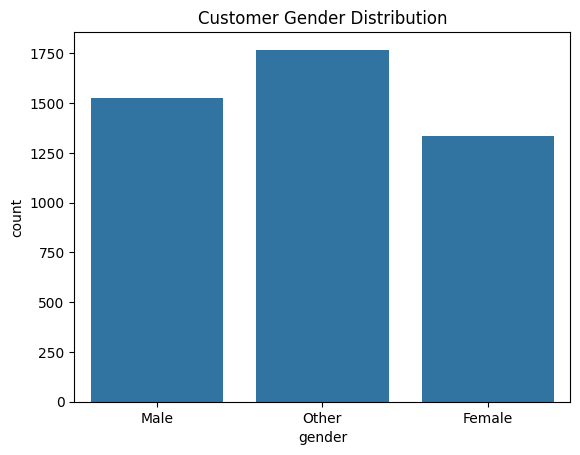

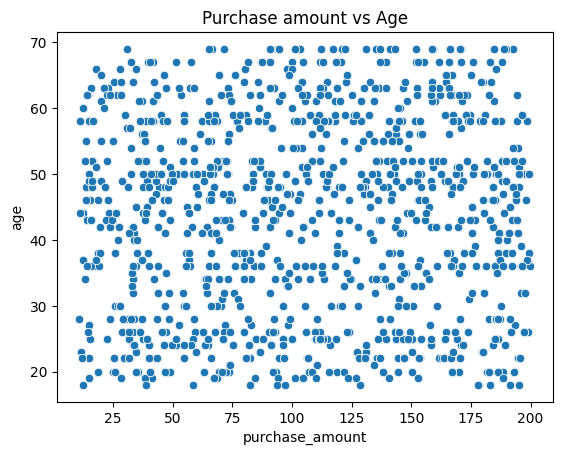

In [8]:

# EDA (visualizations)
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(customer_master['age'].dropna())
plt.title("Customer Age Distribution")
plt.show()

sns.countplot(x='gender', data=customer_master.dropna(subset=['gender']))
plt.title("Customer Gender Distribution")
plt.show()

sns.scatterplot(x='purchase_amount', y='age', data=customer_master.dropna(subset=['purchase_amount','age']))
plt.title('Purchase amount vs Age')
plt.show()